## Data Description:
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

## Domain:
Object recognition

## Context:
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

## Attribute Information:
 All the features are geometric features extracted from the silhouette. <br>
 All are numeric in nature.

## Learning Outcomes:
 Exploratory Data Analysis <br>
 Reduce number dimensions in the dataset with minimal information loss <br>
 Train a model using Principle Components 

## Objective:
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

## Steps and tasks:

### 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
vehicle_df=pd.read_csv("vehicle-1.csv")
df=vehicle_df.copy()
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
# Below gives complete information about data.
# Provides 5 point summary for numerical attributes[Mininum, First Quantile[25%], Median[50%], Third Quantile[75%], Max]. 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,846,NaN,NaN,NaN,93.6785,8.23447,73,87,93,100,119
circularity,841,NaN,NaN,NaN,44.8288,6.15217,33,40,44,49,59
distance_circularity,842,NaN,NaN,NaN,82.1105,15.7783,40,70,80,98,112
radius_ratio,840,NaN,NaN,NaN,168.888,33.5202,104,141,167,195,333
pr.axis_aspect_ratio,844,NaN,NaN,NaN,61.6789,7.89146,47,57,61,65,138
max.length_aspect_ratio,846,NaN,NaN,NaN,8.56738,4.60122,2,7,8,10,55
scatter_ratio,845,NaN,NaN,NaN,168.902,33.2148,112,147,157,198,265
elongatedness,845,NaN,NaN,NaN,40.9337,7.81619,26,33,43,46,61
pr.axis_rectangularity,843,NaN,NaN,NaN,20.5824,2.59293,17,19,20,23,29
max.length_rectangularity,846,NaN,NaN,NaN,147.999,14.5157,118,137,146,159,188


Observations:

1. There are null values in many columns. This can be identified by observing the count for the columns where its not equal to the total no. of rows present (846).
2. Except "scaled_variance.1" column, rest other columns have almost mean=median. This indicates that data is either uniformly or normally distributed. Can be further confirmed in univariate analysis.
3. Half of the volume of target variable class has 'car'.

In [5]:
# To check if any missing(NaN) values are present
# True indicates that the feature has missing values
df.isna().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [6]:
# To check the skewness of the distribution
df.skew()

compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64

Only below features are skewed and rest others are good enough to be considered as not skewed:

pr.axis_aspect_ratio <br>
max.length_aspect_ratio <br>
scaled_radius_of_gyration.1 <br>

#### Imputing

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
# For almost all except 'scaled_variance.1' mean and median are close enough.
# Considering the skewness for some columns, going with median replacement.

sm=SimpleImputer(missing_values=np.nan,strategy='median')
sm=sm.fit(df.iloc[:,:-1])
df.iloc[:,:-1]=sm.transform(df.iloc[:,:-1])
df.isna().values.any()

False

#### Univariate analysis:

In [9]:
# Function for creating histogram and box-plot side by side for continuous variables
# Histogram plot is to help in understanding the distribution of the feature
# Box-plot is to see the data spread across quantiles and also to identify outliers if any
def numerical_feature_plot(feature):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
    sns.distplot(df[feature],ax=ax[0])
    ax[0].set_title("Histogram of "+feature)
    sns.boxplot(y=df[feature],ax=ax[1])
    ax[1].set_title("Boxplot of "+feature)

In [10]:
def numerical_feature_analysis(feature):
    feature_min=df[feature].min()
    feature_max=df[feature].max()
    feature_q1=np.quantile(df[feature],0.25)
    feature_q3=np.quantile(df[feature],0.75)
    feature_IQR=(feature_q3-feature_q1)
    feature_lower_whisker=feature_q1-(feature_IQR*1.5)
    feature_upper_whisker=feature_q3+(feature_IQR*1.5)

    print("Feature: ",feature)
    if (feature_lower_whisker<=feature_min) and (feature_upper_whisker>=feature_max):
        print("No outliers.")
    else:
        if (feature_upper_whisker<feature_max):
            print("Outliers are present in maximum. ",feature," above ",round(feature_upper_whisker,2)," are outliers and total are ",df[df[feature]>feature_upper_whisker][feature].count())
        if (feature_lower_whisker>feature_min):
            print("Outliers are present in minimum. ",feature," below ",round(feature_lower_whisker,2)," are outliers and total are ",df[df[feature]<feature_lower_whisker][feature].count())
    
    print("----------------------------------------------------------------------------------------------")

In [11]:
numerical_feature_list=list(df.select_dtypes(exclude='object').columns)
categorical_feature_list=list(df.select_dtypes(include='object').columns)

print("Numerical Features: ",numerical_feature_list)
print("Categorical Features: ",categorical_feature_list)

Numerical Features:  ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio']
Categorical Features:  ['class']


Feature:  compactness
No outliers.
----------------------------------------------------------------------------------------------
Feature:  circularity
No outliers.
----------------------------------------------------------------------------------------------
Feature:  distance_circularity
No outliers.
----------------------------------------------------------------------------------------------
Feature:  radius_ratio
Outliers are present in maximum.  radius_ratio  above  276.0  are outliers and total are  3
----------------------------------------------------------------------------------------------
Feature:  pr.axis_aspect_ratio
Outliers are present in maximum.  pr.axis_aspect_ratio  above  77.0  are outliers and total are  8
----------------------------------------------------------------------------------------------
Feature:  max.length_aspect_ratio
Outliers are present in maximum.  max.length_aspect_ratio  above  14.5  are outliers and total are  12
Outliers are present in minim

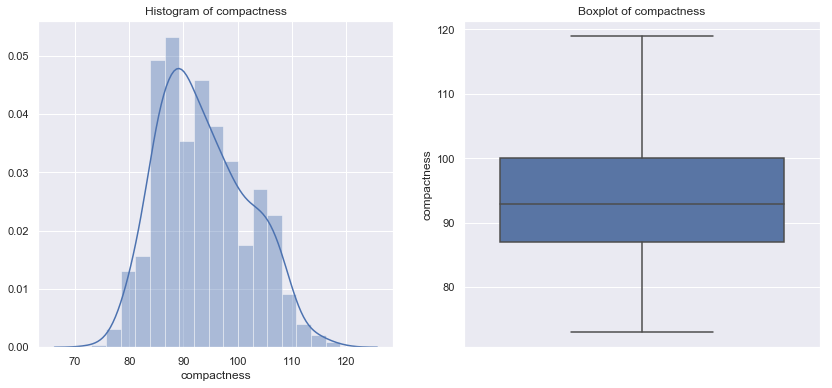

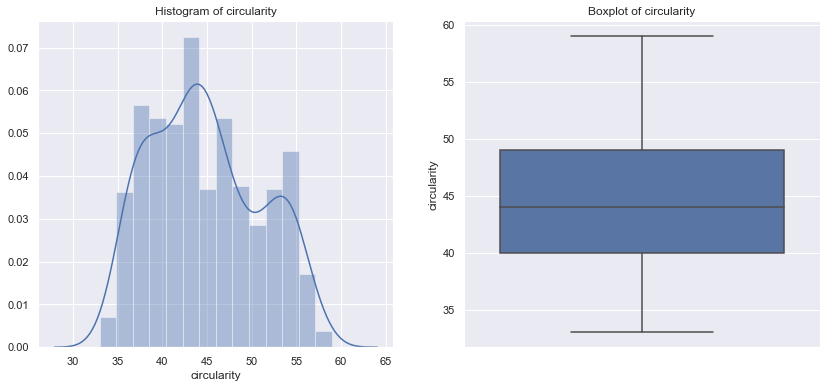

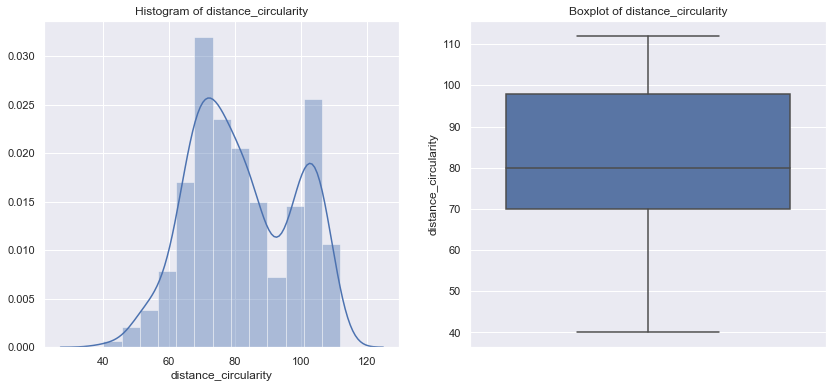

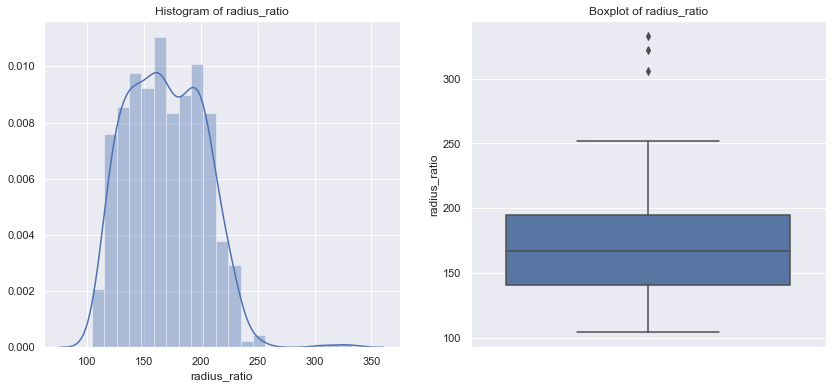

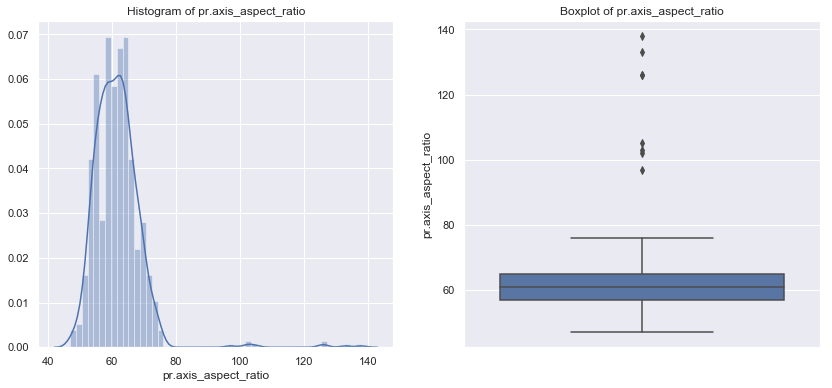

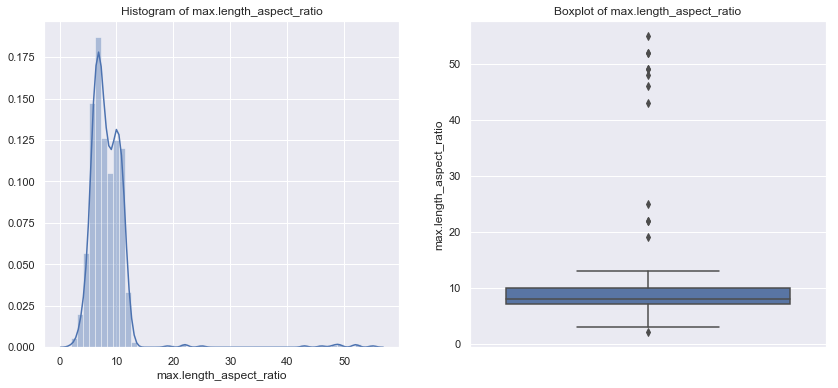

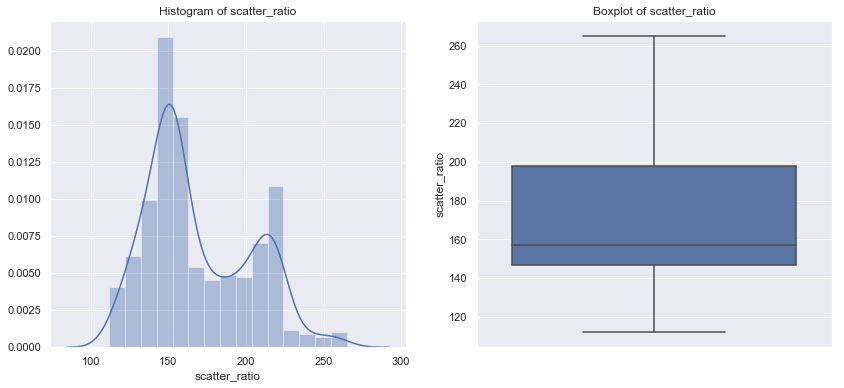

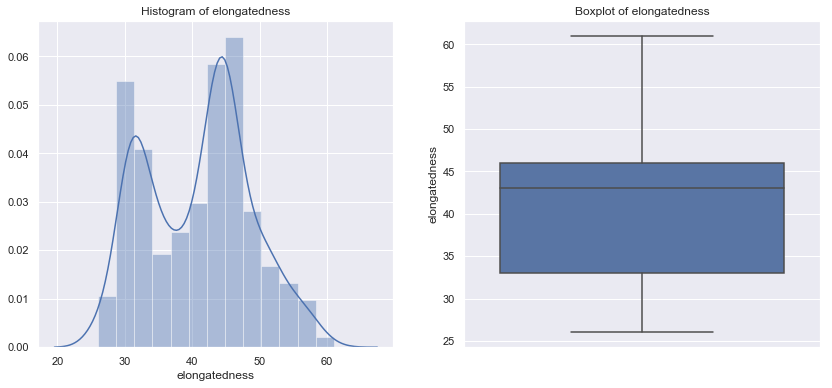

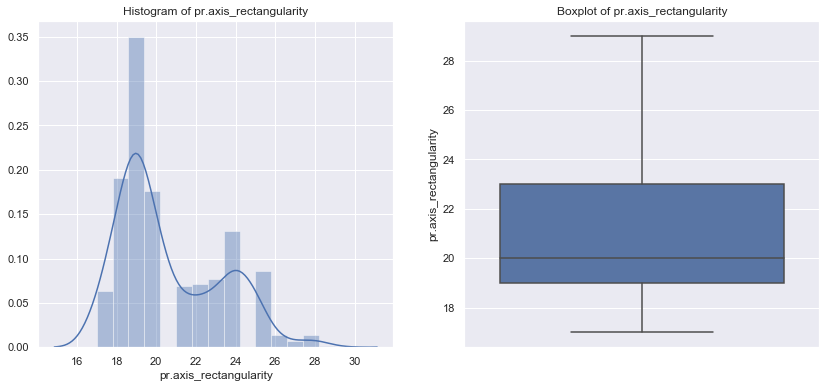

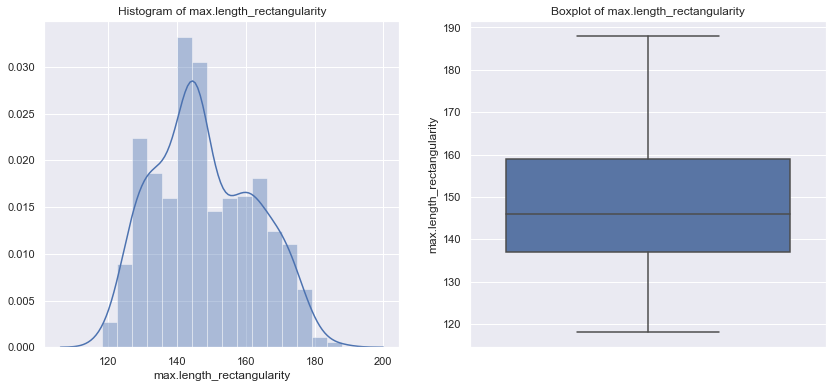

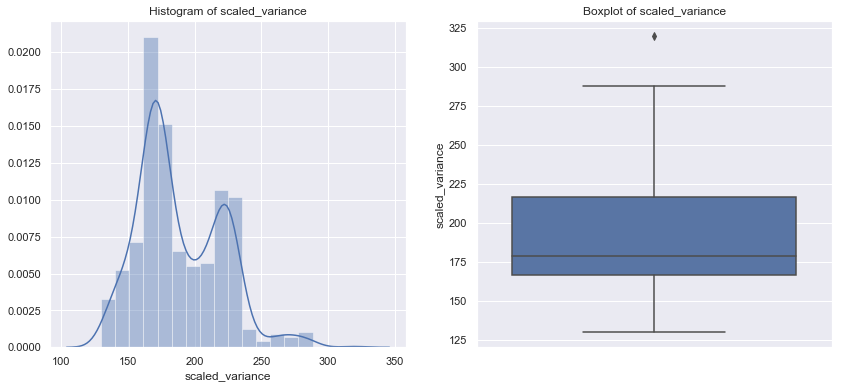

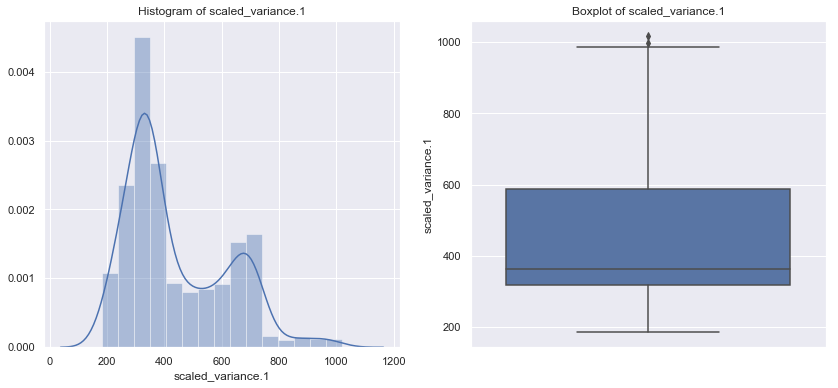

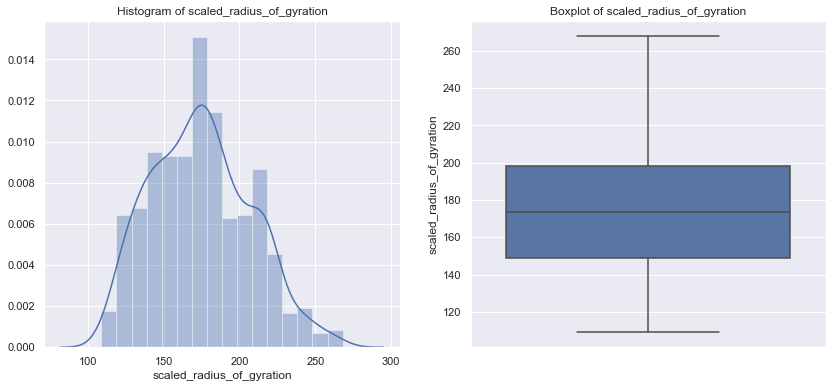

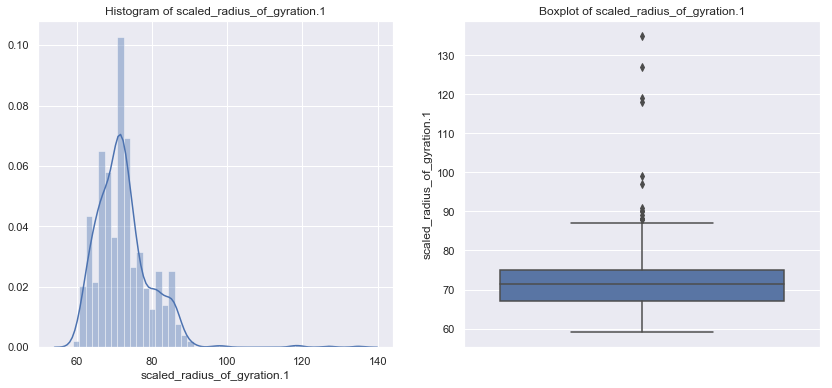

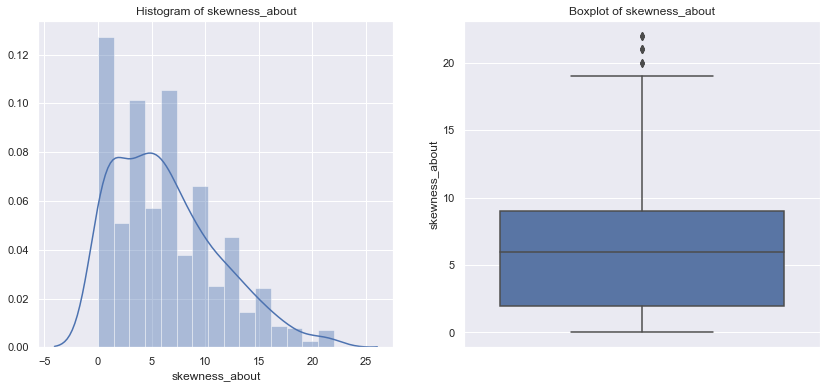

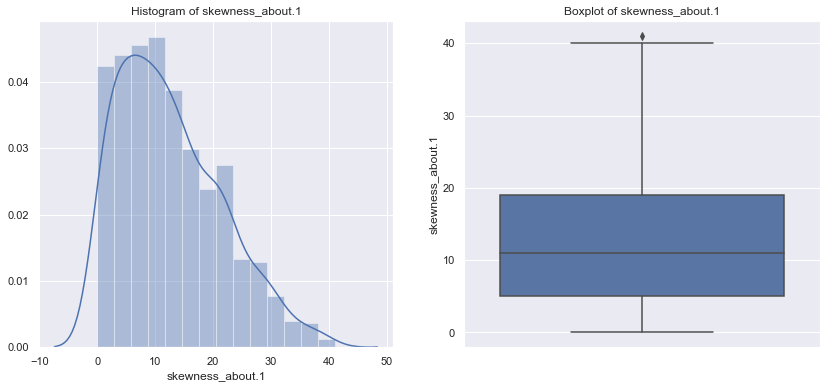

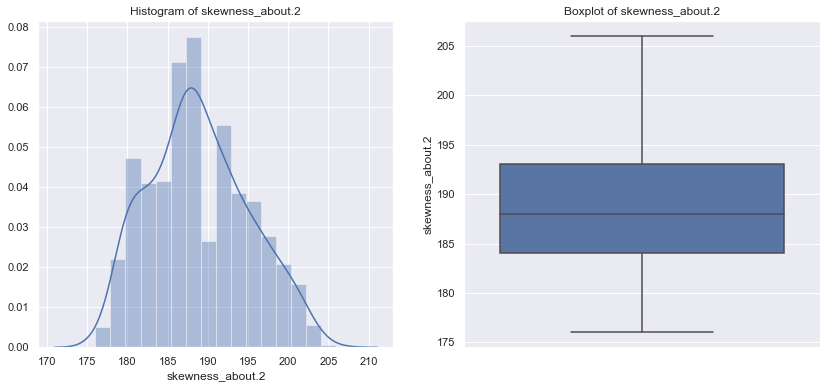

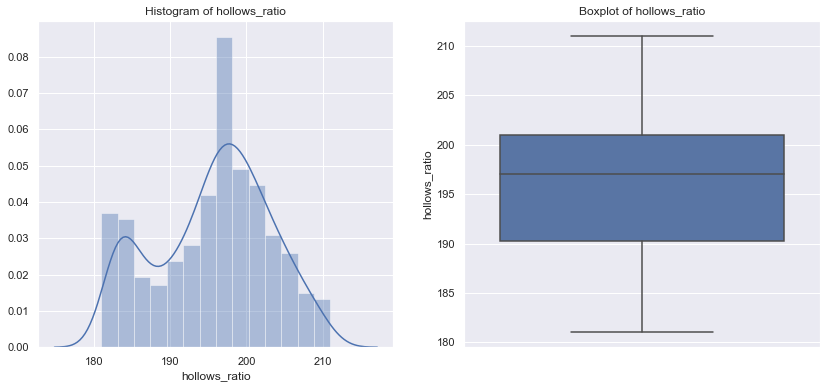

In [12]:
for i in numerical_feature_list:
    numerical_feature_plot(i)
    numerical_feature_analysis(i)

#### Observations:

#### compactness:

Though its not perfect, data looks nearly normal distributed.

#### circularity:

This looks like a mix of 3 normal distributions with their peaks in different locations.

#### distance_circularity:

This seems like a mix of 2 normal distributions. Its a bimodal distribution.

#### radius_ratio:

Though there are outliers, data is compact and looks like a near normal distribution. 

#### pr.axis_aspect_ratio:

Though there are outliers, data is compact and looks like a near normal distribution. 

#### max.length_aspect_ratio:

Data is in bimodal distribution with right skewed outliers.

#### scatter_ratio:

Data is in bimodal distribution.

#### elongatedness:

Data is in bimodal distribution.

#### pr.axis_rectangularity:

Data is in bimodal distribution with right skewness.

#### max.length_rectangularity:

This looks like a mix of 3 normal distributions with their peaks in different locations.

#### scaled_variance:

Data is in bimodal distribution with right skewness.

#### scaled_variance.1:

Data is in bimodal distribution with right skewness.

#### scaled_radius_of_gyration:

This looks like a mix of 3 normal distributions with their peaks in different locations.

#### scaled_radius_of_gyration.1:

This looks like a mix of 3 normal distributions with their peaks in close locations.

#### skewness_about:

Data is Right skewed.

#### skewness_about.1:

Data is Right skewed.

#### skewness_about.2:

This looks like a mix of 2 normal distributions with their peaks in different locations.

#### hollows_ratio:

Data is in bimodal distribution.




In [13]:
# Function for creating count plot and the corresponding percentage distribution plots for categorical variables
# Count plot is to help in understanding the distribution of the feature
# % distribution plot helps us to see the % distribution of different categories for a feature.
def categorical_feature_plot(feature):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
    df[feature].value_counts().plot(kind='bar',ax=ax[0],rot=90,title="Counts of "+feature)
    ax[0].set_xlabel(feature)
    ax[0].set_ylabel("Total Count")
    df[feature].value_counts(normalize=True).plot(kind='bar',ax=ax[1])
    ax[1].set_title("Distribution of "+feature)
    ax[1].set_xlabel(feature)
    ax[1].set_ylabel("% Distribution")
    ax[1].set_xticklabels(df[feature].value_counts(normalize=True).index, rotation=90)

Distribution for feature: class

car    0.507092
bus    0.257683
van    0.235225
Name: class, dtype: float64
------------------------------------------


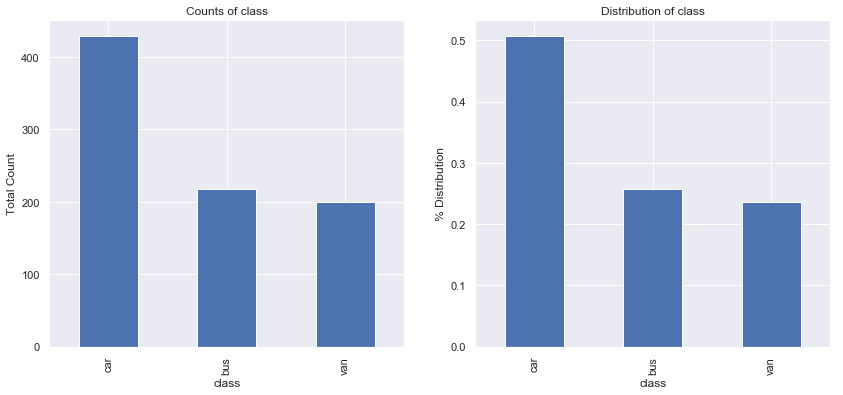

In [14]:
# Plotting for all categorical features
for i in categorical_feature_list:
    categorical_feature_plot(i)
    print("Distribution for feature: "+i+"\n")
    print(df[i].value_counts(normalize=True).head(20))
    print("------------------------------------------")

### 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)

<Figure size 864x864 with 0 Axes>

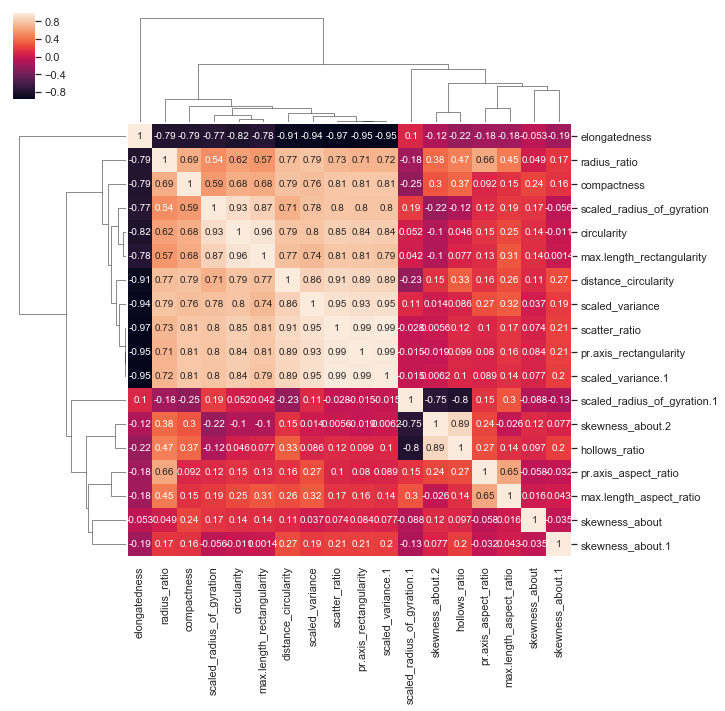

In [17]:
# For continuous variables, Correlation with Heatmap serves as starting point
plt.figure(figsize=(12,12))
#sns.heatmap(df.corr(),annot=True)
sns.clustermap(df.corr(),annot=True)

In [18]:
def feature_target_plot(feature):
    #plt.figure(figsize=(12,12))
    #nbins=df[feature]
    g=sns.FacetGrid(data=df,col='class',height=5, aspect =1.5)
    g.map(plt.hist,feature)
    g.set_xticklabels(rotation=90)
    

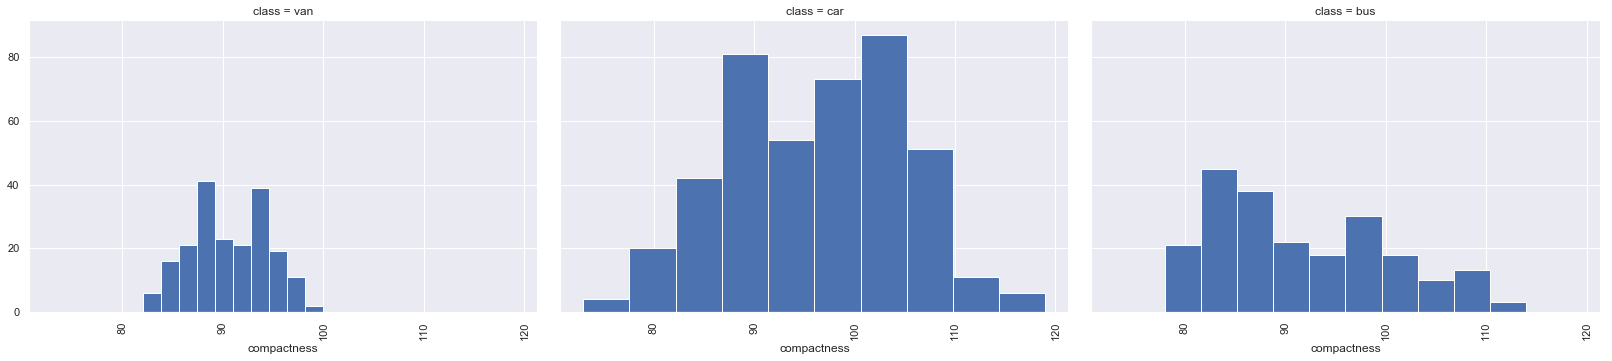

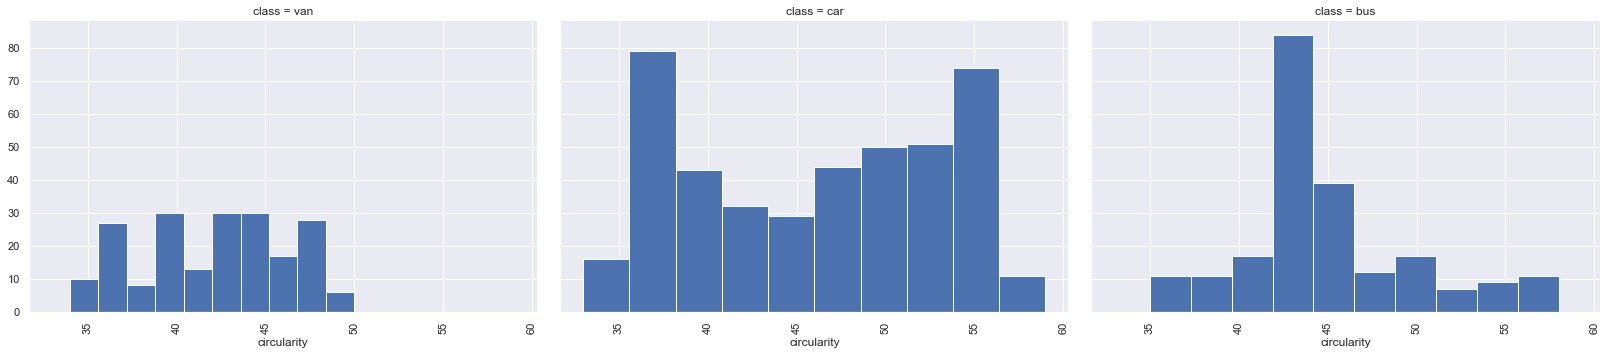

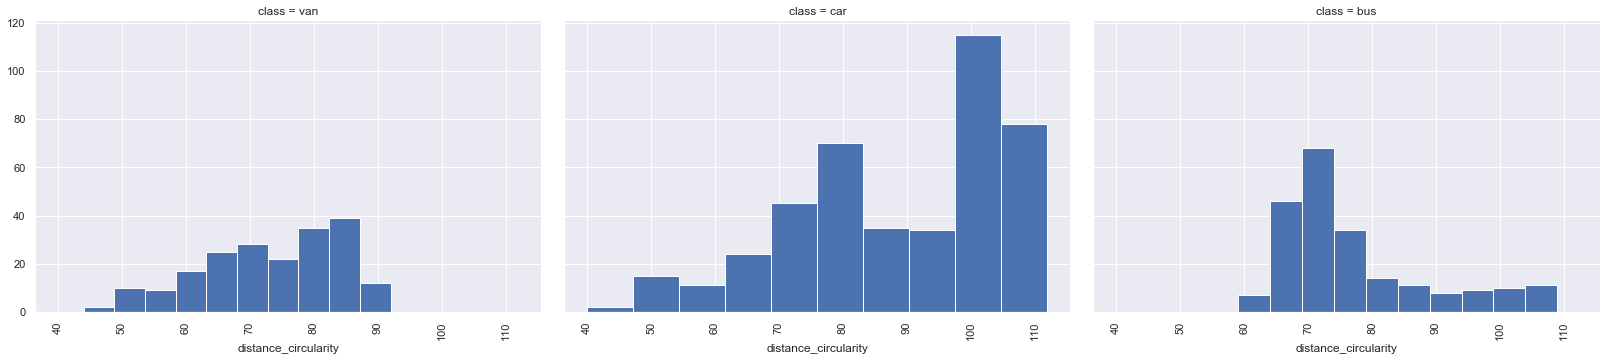

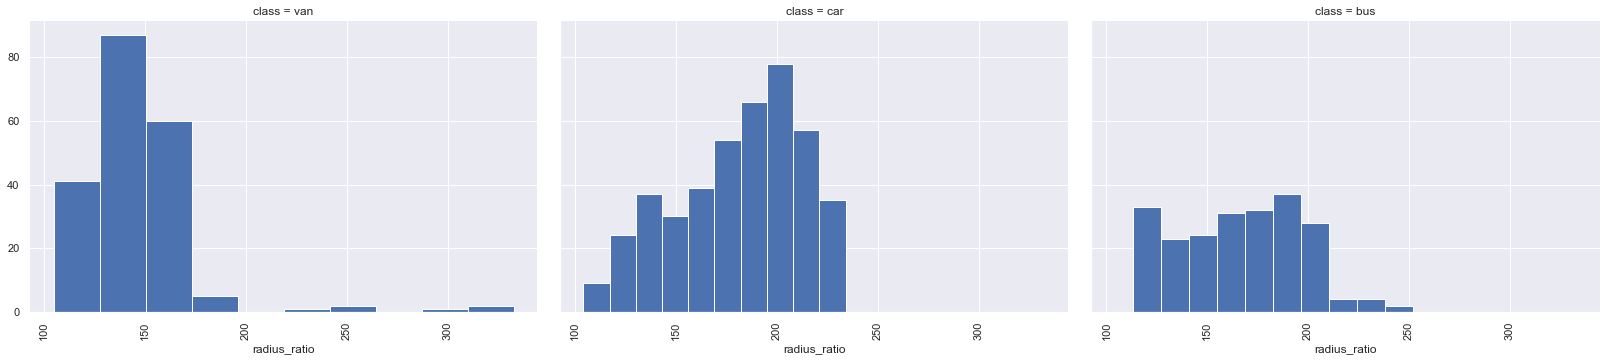

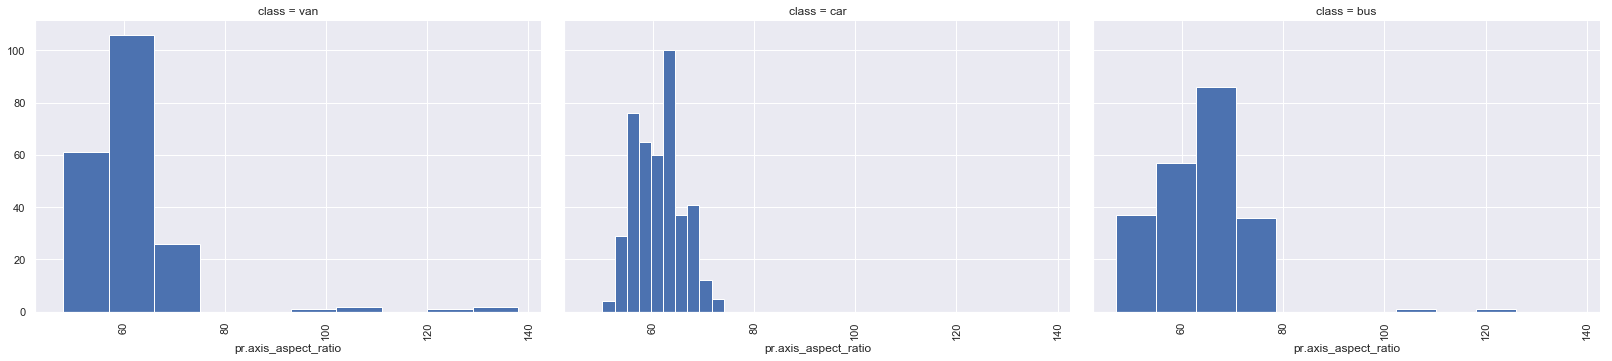

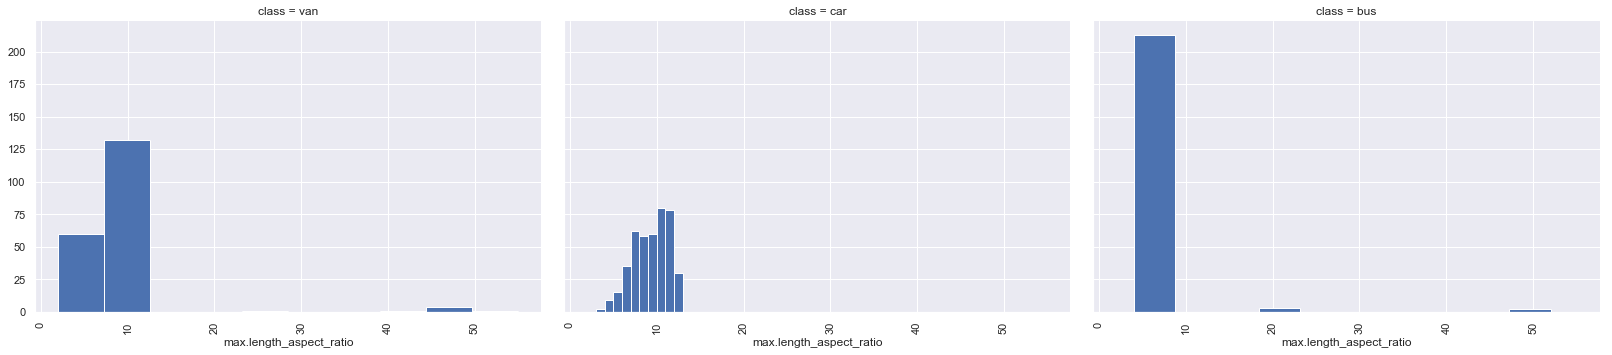

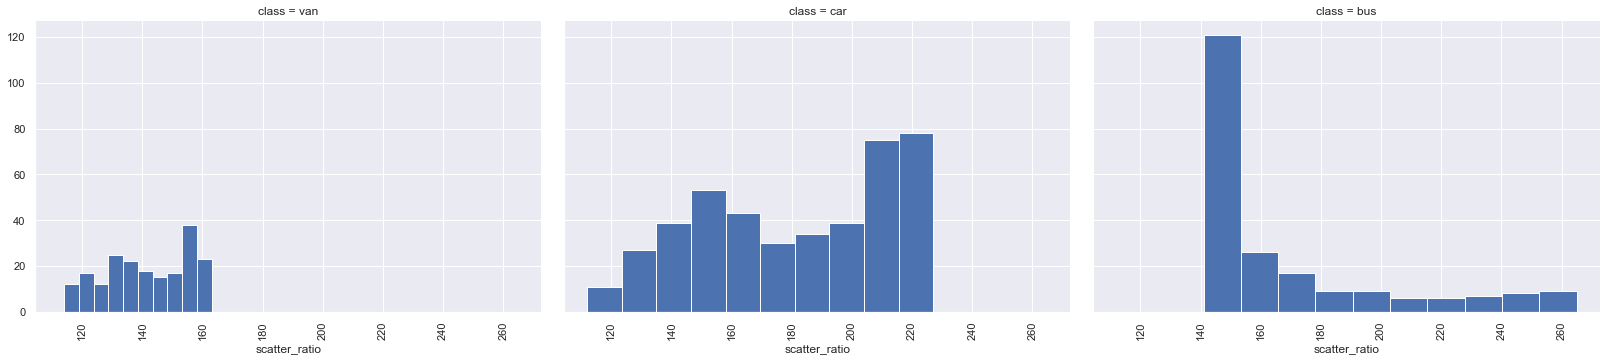

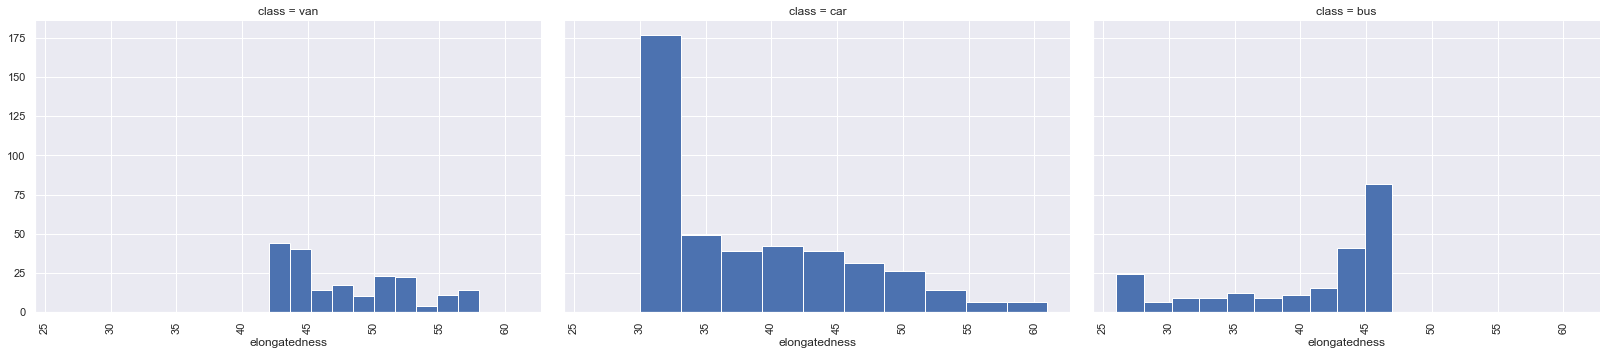

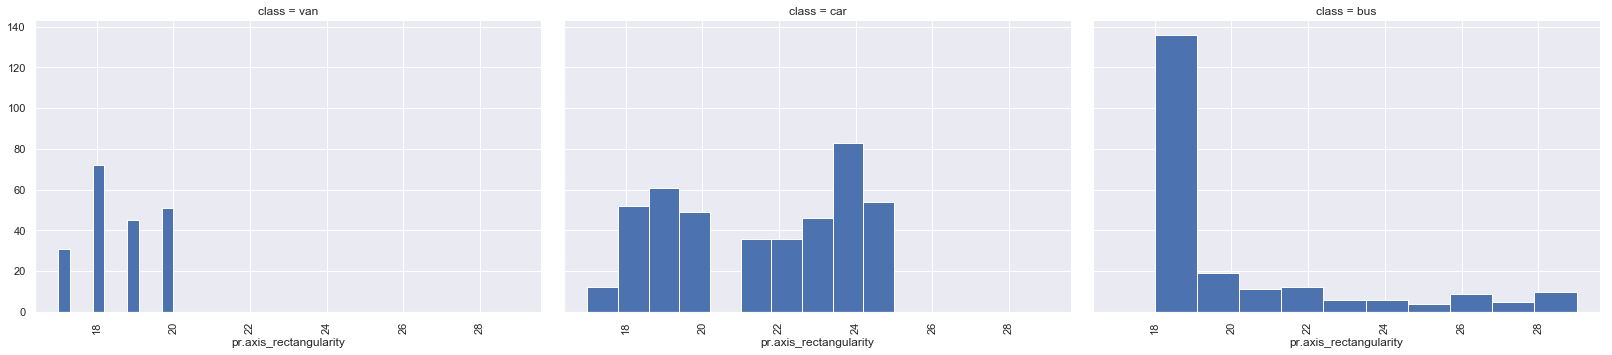

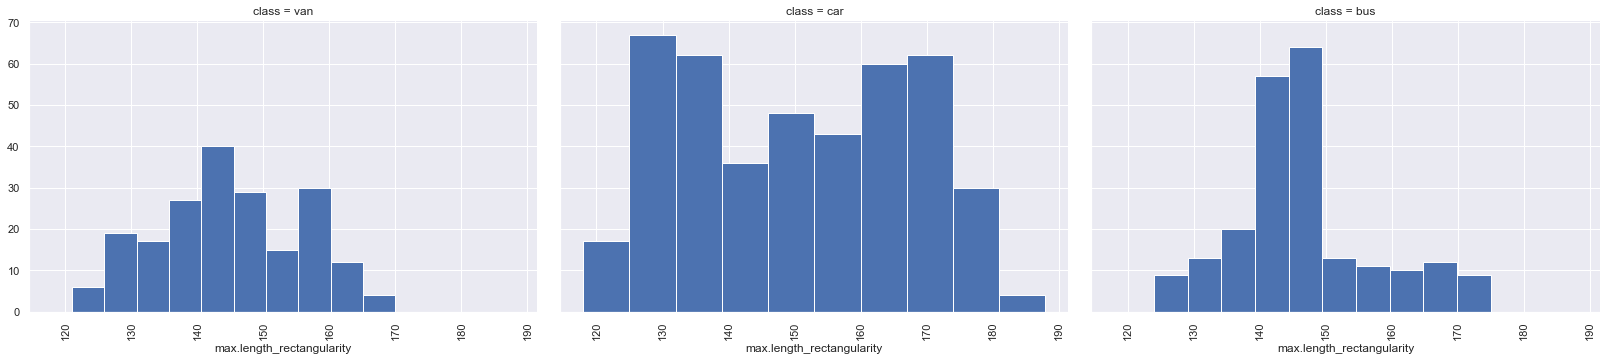

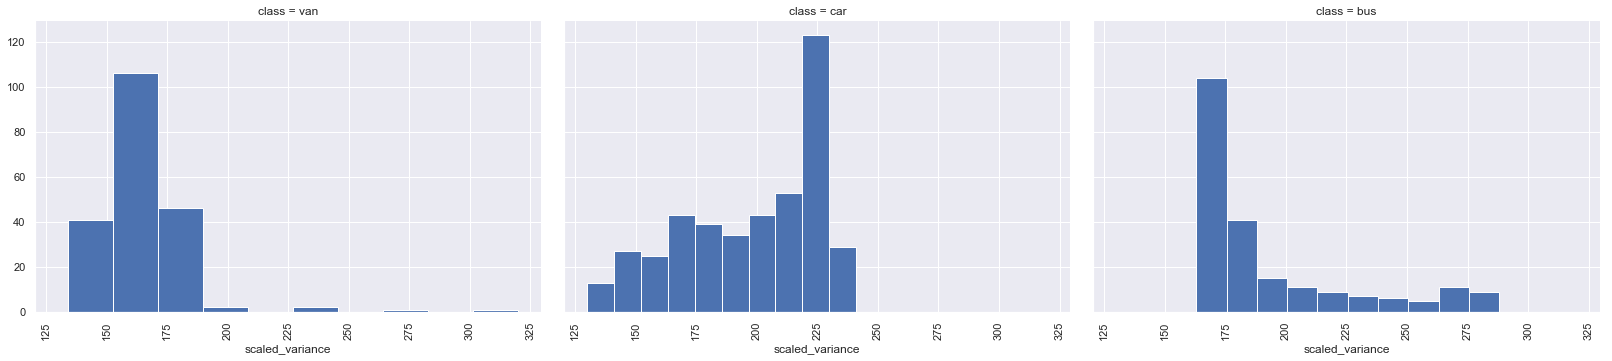

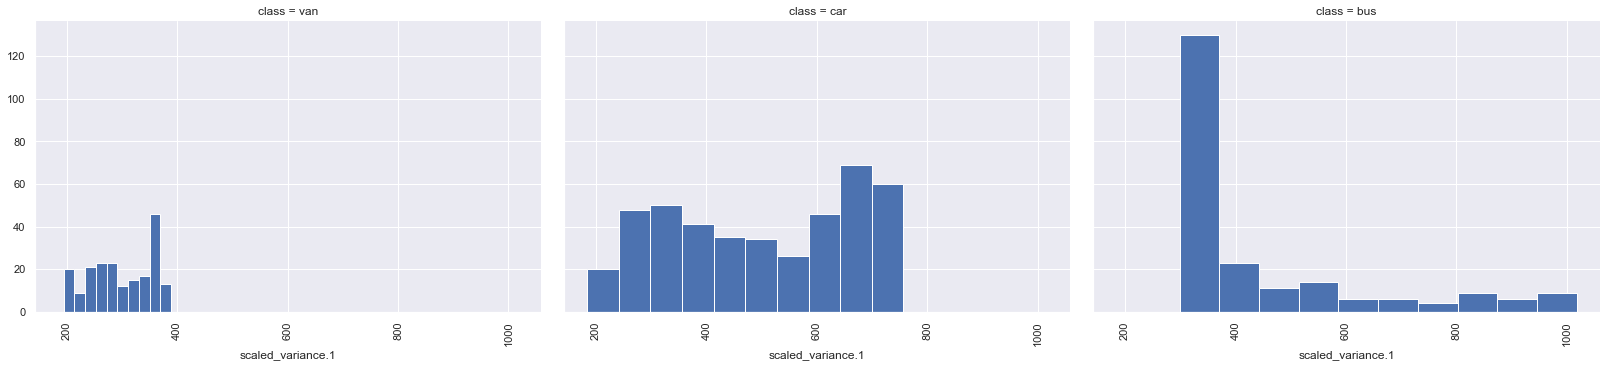

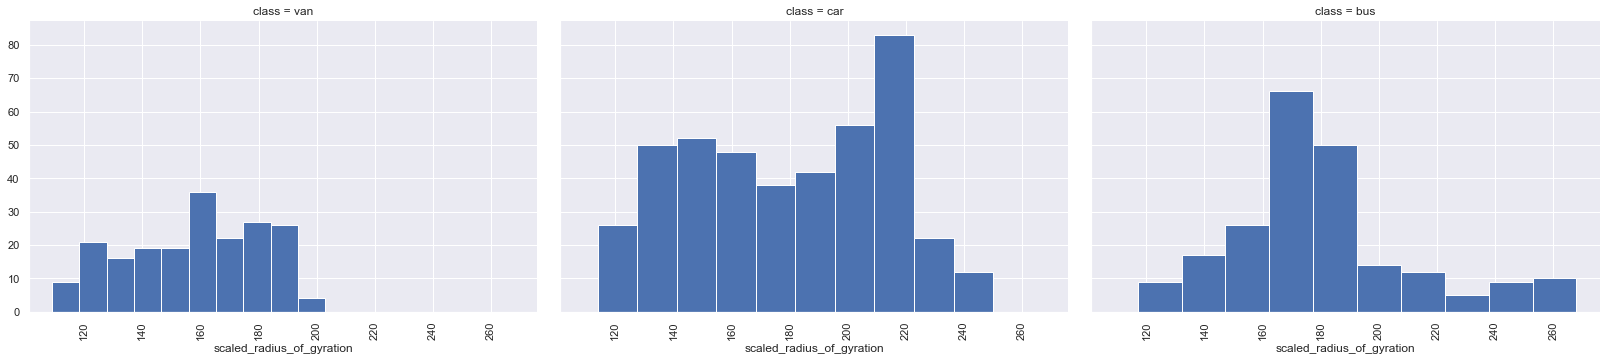

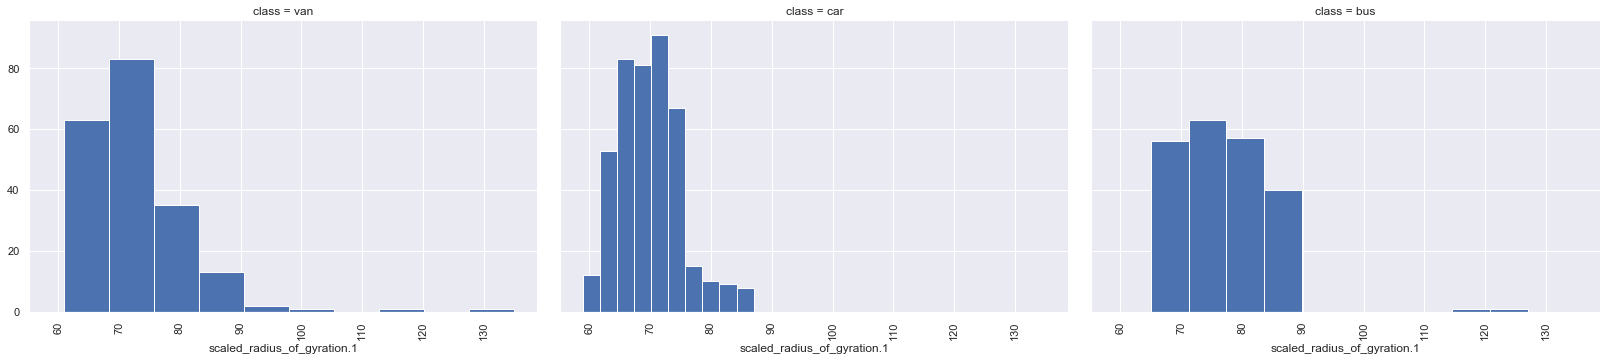

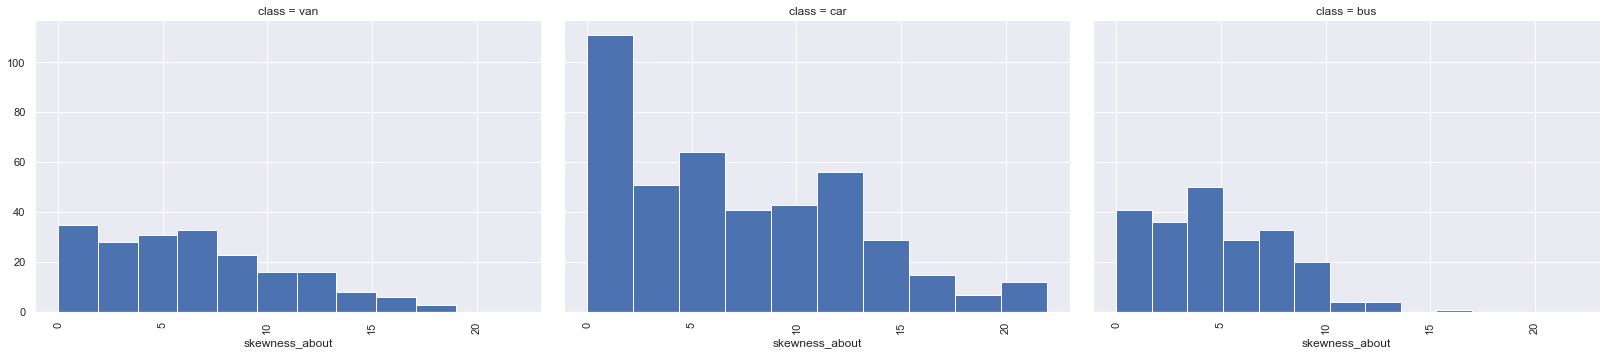

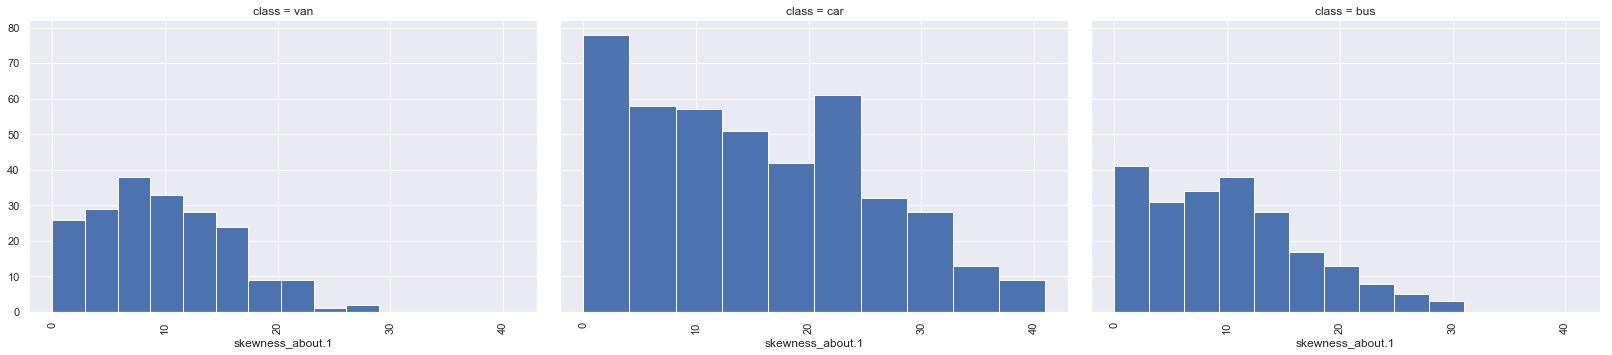

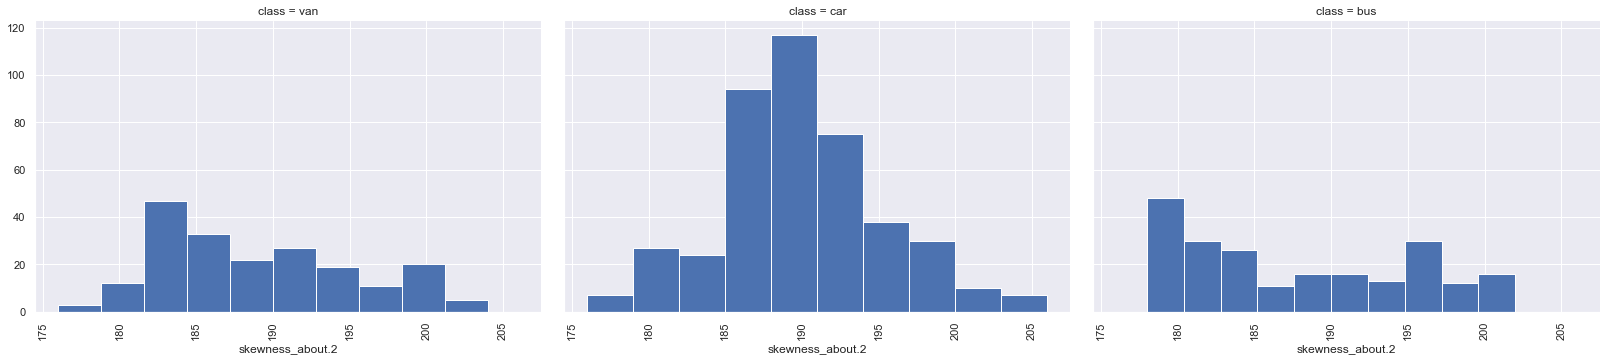

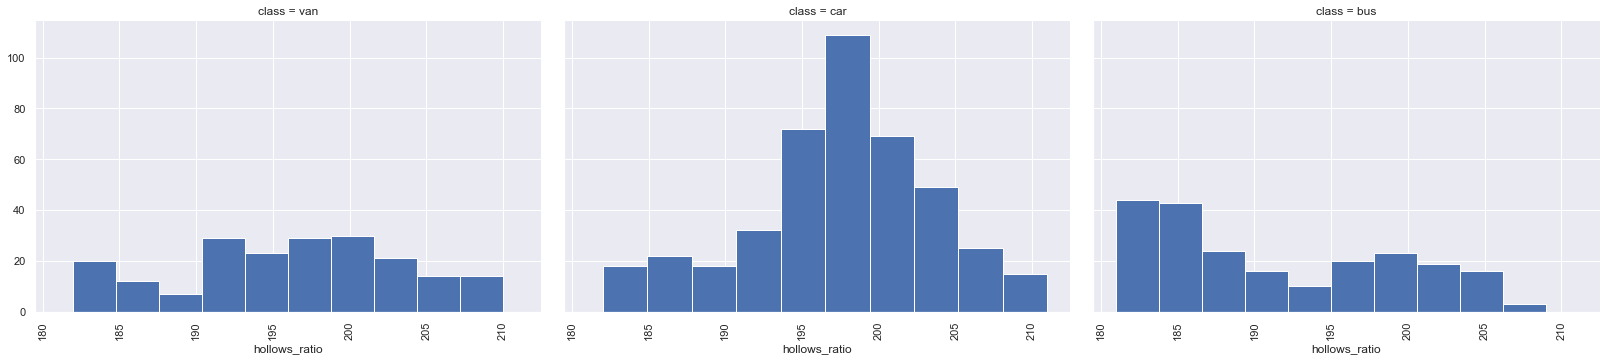

In [19]:
for i in df.columns:
    if i!='class':
        feature_target_plot(i)

In [20]:
def feature_target_analysis(feature,count):
    plt.figure(count,figsize=(8,6))
    sns.boxplot(x='class',y=feature,data=df)

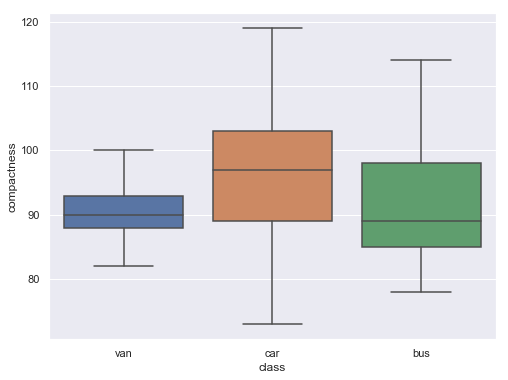

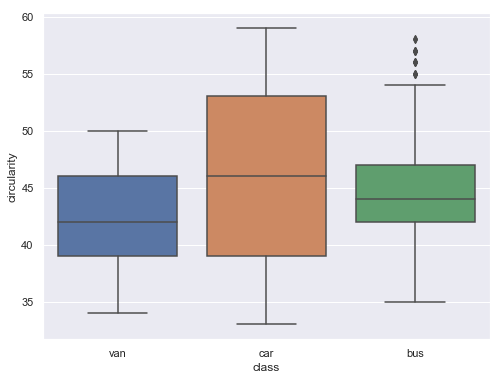

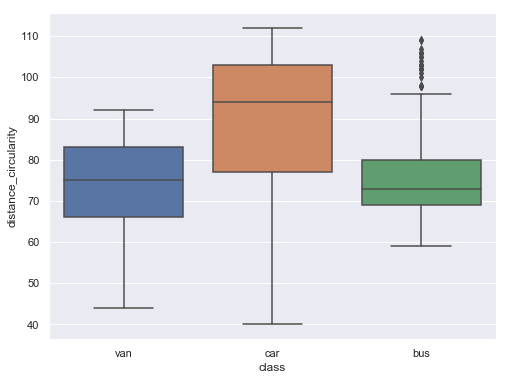

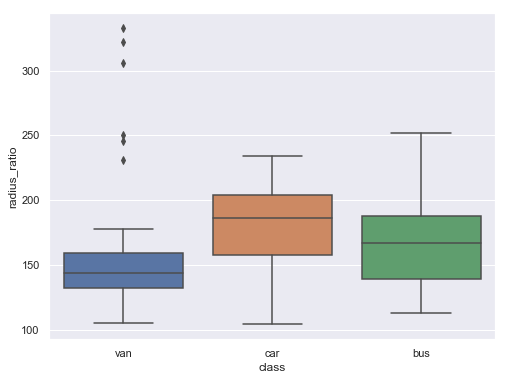

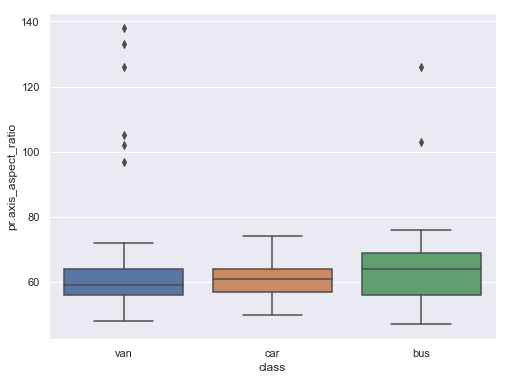

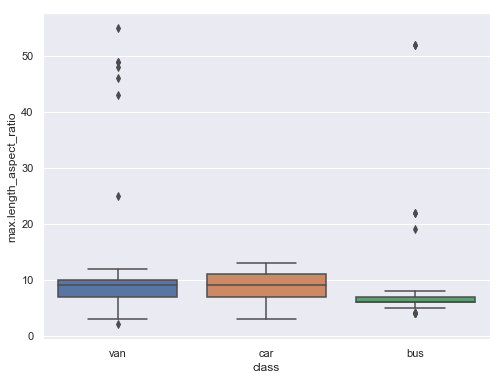

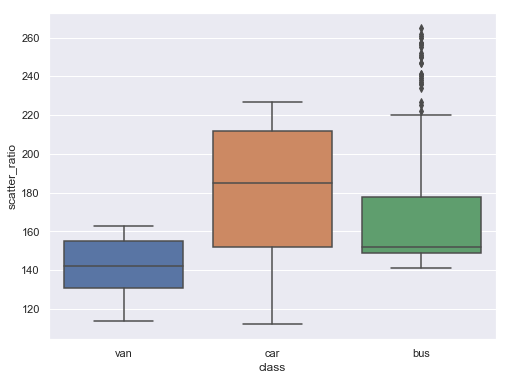

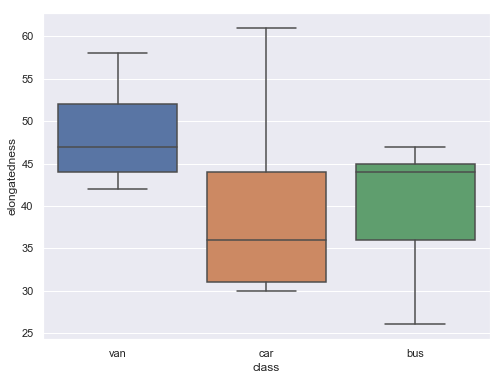

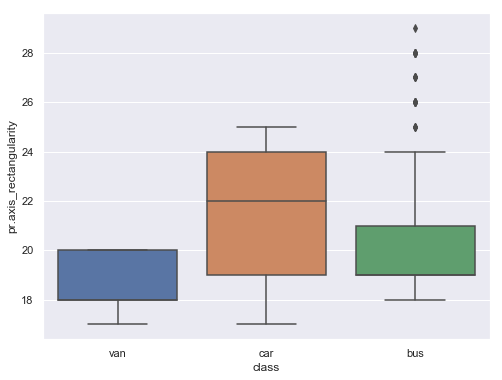

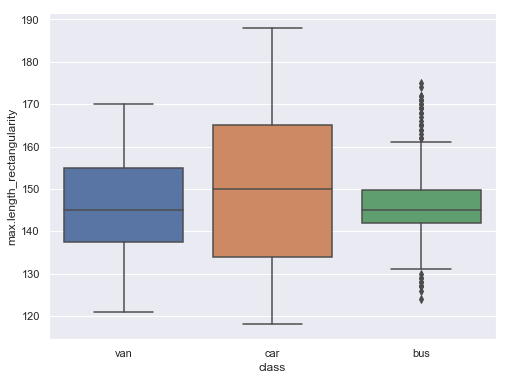

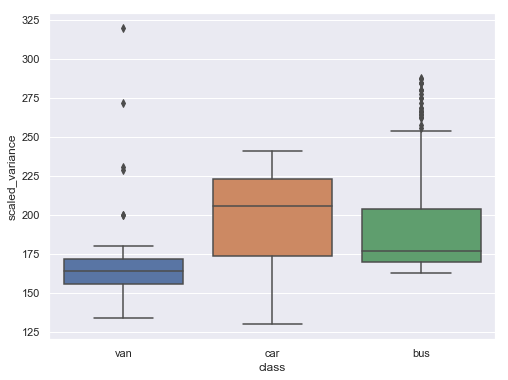

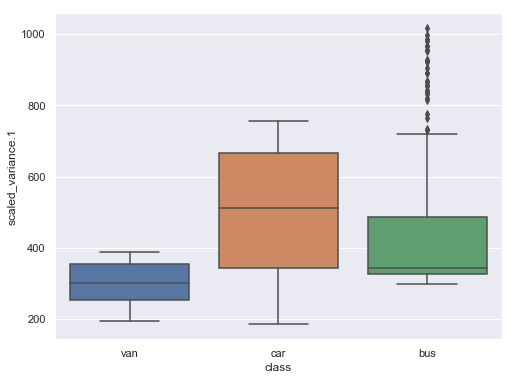

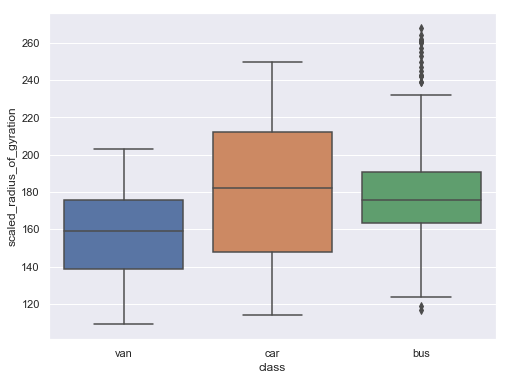

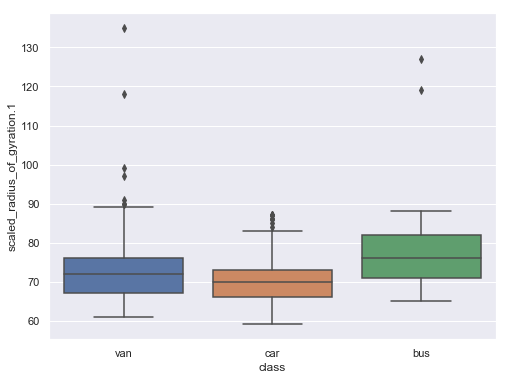

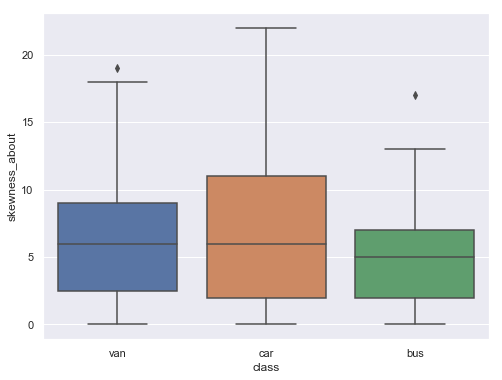

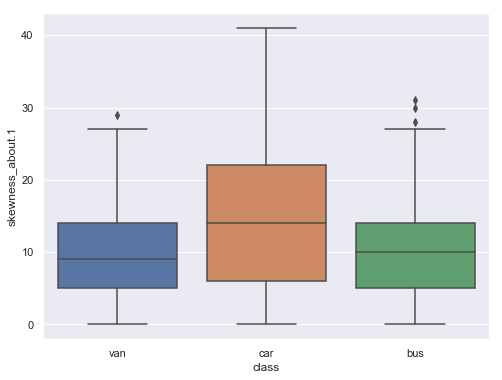

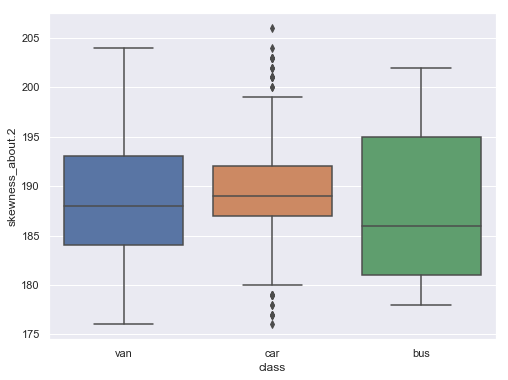

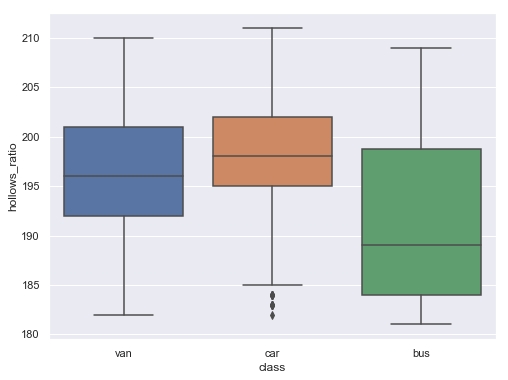

In [21]:
count=0
for i in df.columns:
    if i!='class':
        count+=1
        feature_target_analysis(i,count)

#### Observations from boxplots and hist:

#### compactness:
For class='van', compactness value is within 100. This can help to differentiate van from other classes to an extent.
Because more than 25% of class 'car' has compactness>100 and for bus its around 20%
And even for compactness<80, we can consider that its not 'van'.

outcome: 
This can help to identifying that a particular class is not 'van' to an extent and it can be of any of the other classes ['bus' or 'car'].

#### circularity:
For class='van', circularity value is within 50. This can help to differentiate van from other classes to an extent.
Because more than 25% of class 'car' has circularity>50 and for bus its around half of 25%

outcome: This can help to identifying that a particular class is not 'van' to an extent and it can be of any of the other classes ['bus' or 'car'].

#### distance_circularity:
For class='van' the max value is just above 90. For class 'car' , half of them are having values greater than max values of 'van' and 'bus' by ignoring the outliers.
And also, for class 'bus' min value is 60 and other classes are having values less than that.

outcome: This can be a good identifier for class 'car' and almost half of them can be identified with this.

#### radius_ratio:
As close as 50% of other classes are having values greater than class 'van' max.

outcome: This can help to identifying that a particular class is not 'van' to a good extent and it can be of any of the other classes ['bus' or 'car'].
This feature can be better than compactness and circularity.

#### pr.axis_aspect_ratio:
All classes are having values of almost same range. So this can not help much. However in upper quantiles, bus has 50% of data when 25% each of van and car are present.

outcome: This can help in identifying class 'bus' to a minimal extent.

#### max.length_aspect_ratio:
class 'bus' has a very narrow range for this. More than 50% of other classes are having values greater than max of class 'bus'.

outcome: This can help to identifying that a particular class is not 'bus' to a good extent and it can be of any of the other classes ['van' or 'car'].

#### scatter_ratio:
Around 60-65% of class 'car' are having values greater than class 'van' max.
Around 30% of class 'bus' are having values greater than class 'van' max. 
And also, for class 'bus', min value is greater than 50% of class 'van' and around 20% of class 'car'

outcome: This can help to identifying that a particular class is not 'van' to a good extent and it can be of any of the other classes ['bus' or 'car'].
And also, this can help in ruling out that a particular class is 'bus' to a reasonable extent by considering the minimum value of it.
Looks like this feature is better than 'radius_ratio'. 

#### elongatedness: 
More than 50% of class 'van' values are greater than max value of 'bus'.
More than 20% of class 'car' values are greater than max value of 'bus'.
And also, for class 'van', its min value is greater than 60-70% of class 'car'. And for 'bus' its close to 50%.

outcome: This can help to identifying that a particular class is not 'bus' to a good extent and it can be of any of the other classes ['van' or 'car'].
And also, this can help in ruling out that a particular class is 'van' to a very good extent by considering the minimum value of it.
Looks like this feature is better than 'scatter_ratio'. 

#### pr.axis_rectangularity:
Around 60-70% of class 'car' are having values greater than class 'van' max.
Around 35% of class 'bus' are having values greater than class 'van' max.

25% of class 'car' are having values greater than class 'bus' max. 

25% of class 'van' are having values less than class 'bus' min.
Half of 25% of class 'car' are having values less than class 'bus' min.

outcome:  This can help to identifying that a particular class is not 'van' to a good extent and it can be of any of the other classes ['bus' or 'car'].
On top of above filter, we can differentiate 25% of class 'car' in its upper quantile.
And also, it can help in ruling out class 'bus' to an extent.
Though this feature is not better than 'elongatedness', it can help in identifying the upper quantile of cars in clear manner.

#### max.length_rectangularity:
Distributions of classes are all in near by ranges, this doesnt seem to have clear cut rules[human can observe] in identifying the classes.

#### scaled_variance:
Around 60-70% of class 'car' are having values greater than class 'van' max.And for class 'bus' it is more than 40%.
25% of class 'van' are having values less than class 'bus' min. And for class 'car' its around 15%.

outcome:  This can help to identifying that a particular class is not 'van' to a good extent and it can be of any of the other classes ['bus' or 'car'].
This is not better than elongatedness.

#### scaled_variance.1:
Around 60-70% of class 'car' are having values greater than class 'van' max.And for class 'bus' it is close to 35%.
50% of class 'van' are having values less than class 'bus' min. And for class 'car' its less than 15%.

outcome:  This can help to identifying that a particular class is not 'van' to a good extent and it can be of any of the other classes ['bus' or 'car'].
This is not better than elongatedness.

#### scaled_radius_of_gyration:
Distributions of classes are all in near by ranges, this doesnt seem to have clear cut rules[human can observe] in identifying the classes.

#### scaled_radius_of_gyration.1:
Distributions of classes are all in near by ranges, this doesnt seem to have clear cut rules[human can observe] in identifying the classes.

#### skewness_about:
Distributions of classes are all in near by ranges, this doesnt seem to have clear cut rules[human can observe] in identifying the classes.

#### skewness_about.1:
Distributions of classes are all in near by ranges, this doesnt seem to have clear cut rules[human can observe] in identifying the classes.

#### skewness_about.2:
Distributions of classes are all in near by ranges, this doesnt seem to have clear cut rules[human can observe] in identifying the classes.
However in higher and lower quantiles only for class 'car'.

#### hollows_ratio:
Distributions of classes are all in near by ranges, this doesnt seem to have clear cut rules[human can observe] in identifying the classes.

#### Conclusion:

Finally, by considering all the above analysis, below can be used for the next stage of pre-processing:

distance_circularity <br>
pr.axis_aspect_ratio <br>
elongatedness <br>
pr.axis_rectangularity  <br>
scaled_radius_of_gyration <br>
scaled_radius_of_gyration.1 <br>
skewness_about <br>
skewness_about.1 <br>
skewness_about.2 <br>
hollows_ratio <br>


Again performing Clustermap to see any features are correlated.

<Figure size 864x720 with 0 Axes>

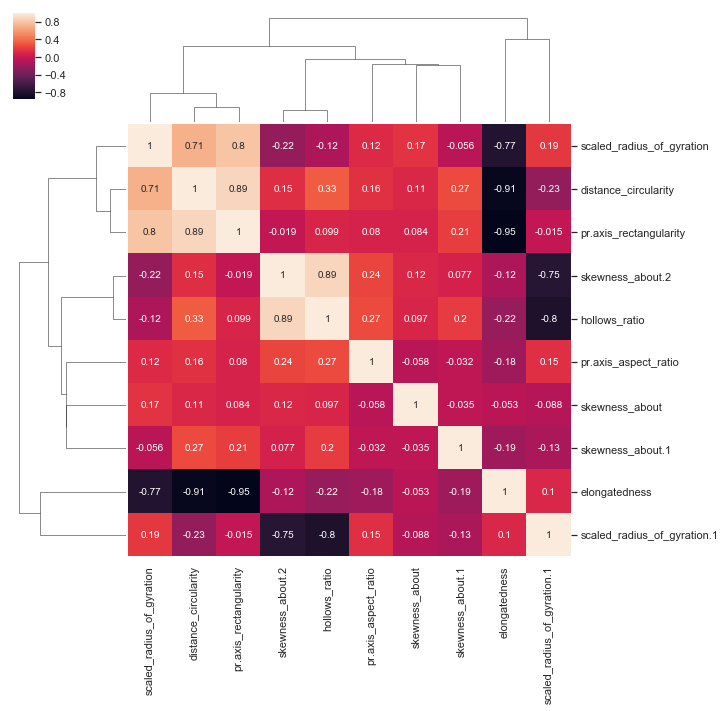

In [22]:
# For continuous variables, Correlation with Heatmap serves as starting point
plt.figure(figsize=(12,10))
# Performing clustermap only for features selected in above analysis.
sns.clustermap(df[['distance_circularity','pr.axis_aspect_ratio','elongatedness','pr.axis_rectangularity','scaled_radius_of_gyration',
      'scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio']].corr(),annot=True)

#### Observations:

1. Both features 'distance_circularity' and 'pr.axis_rectangularity' can be removed. Because they are in very high correlation with each other and also with feature 'elongatedness. So if we just keep feature 'elongatedness' then that should be enough.

2. If we remove the two features mentioned in point#1 then rest other features are not highly correlated (i.e., <=0.8). So rest other features can be considered for building the model. Hence final list of features :

    pr.axis_aspect_ratio <br>
    elongatedness <br>
    scaled_radius_of_gyration <br>
    scaled_radius_of_gyration.1 <br>
    skewness_about <br>
    skewness_about.1 <br>
    skewness_about.2 <br>
    hollows_ratio <br>

#### Outlier Treatment

As per above analysis, Outliers are present for below features:

radius_ratio <br>
pr.axis_aspect_ratio <br>
max.length_aspect_ratio <br>
scaled_variance <br>
scaled_variance.1 <br>
scaled_radius_of_gyration.1 <br>
skewness_about <br>
skewness_about.1 <br>

Decision: These outliers for each feature are far from the dataset. Its safe to remove these outliers or we can update the values of these with the median values of the corresponding classes. Since our dataset is less, lets go with updating these outliers with median values of the corresponding class['car','bar','van'].

-----------------------------------------------------------------------------------------------------------------
Feature:  radius_ratio <br>
Outliers are present in maximum.  radius_ratio  above  276.0  are outliers and total are  3



In [23]:
df[df['radius_ratio']>276]['class'].unique()

array(['van'], dtype=object)

Above states that all outliers for this feature belong to van class.

In [24]:
df[df['class']=='van'][['radius_ratio','class']].groupby(by='class').median()

,radius_ratio
class,
van,144.0


In [25]:
# To map the above resulted median values to outliers
df.loc[df['radius_ratio']>276,'radius_ratio']=df[df['class']=='van'][['radius_ratio','class']].groupby(by='class').median().loc['van','radius_ratio']

Feature:  pr.axis_aspect_ratio <br>
Outliers are present in maximum.  pr.axis_aspect_ratio  above  77.0  are outliers and total are  8

In [26]:
df[['pr.axis_aspect_ratio','class']].groupby(by='class').median()

,pr.axis_aspect_ratio
class,
bus,64.0
car,61.0
van,59.0


In [27]:
# To map the above resulted median values to outliers
for i in df['class'].unique():
    df.loc[(df['pr.axis_aspect_ratio']>77) & (df['class']==i),'pr.axis_aspect_ratio']=df[['pr.axis_aspect_ratio','class']].groupby(by='class').median().loc[i,'pr.axis_aspect_ratio']

Feature:  max.length_aspect_ratio <br>
Outliers are present in maximum.  max.length_aspect_ratio  above  14.5  are outliers and total are  12 <br>
Outliers are present in minimum.  max.length_aspect_ratio  below  2.5  are outliers and total are  1 <br>

In [28]:
df[df['max.length_aspect_ratio']>14.5]['class'].unique()

array(['bus', 'van'], dtype=object)

Above states that all outliers for this feature belong to bus and van class.

In [29]:
df[['max.length_aspect_ratio','class']].groupby(by='class').median()

,max.length_aspect_ratio
class,
bus,6.0
car,9.0
van,9.0


In [30]:
# To map the above resulted median values to outliers
for i in df['class'].unique():
    df.loc[(df['max.length_aspect_ratio']>14.5) & (df['class']==i),'max.length_aspect_ratio']=df[['max.length_aspect_ratio','class']].groupby(by='class').median().loc[i,'max.length_aspect_ratio']
    df.loc[(df['max.length_aspect_ratio']<2.5) & (df['class']==i),'max.length_aspect_ratio']=df[['max.length_aspect_ratio','class']].groupby(by='class').median().loc[i,'max.length_aspect_ratio']

Feature:  scaled_variance <br>
Outliers are present in maximum.  scaled_variance  above  292.0  are outliers and total are  1

In [31]:
df[df['scaled_variance']>292]['class'].unique()

array(['van'], dtype=object)

Above states that all outliers for this feature belong to van class.

In [32]:
df[['scaled_variance','class']].groupby(by='class').median()

,scaled_variance
class,
bus,177.0
car,206.0
van,164.0


In [33]:
# To map the above resulted median values to outliers
for i in df['class'].unique():
    df.loc[(df['scaled_variance']>292) & (df['class']==i),'scaled_variance']=df[['scaled_variance','class']].groupby(by='class').median().loc[i,'scaled_variance']

Feature:  scaled_variance.1 <br>
Outliers are present in maximum.  scaled_variance.1  above  989.5  are outliers and total are  2

In [34]:
df[df['scaled_variance.1']>989.5]['class'].unique()

array(['bus'], dtype=object)

Above states that all outliers for this feature belong to bus class.

In [35]:
df[['scaled_variance.1','class']].groupby(by='class').median()

,scaled_variance.1
class,
bus,344.0
car,511.0
van,300.0


In [36]:
# To map the above resulted median values to outliers
for i in df['class'].unique():
    df.loc[(df['scaled_variance.1']>989.5) & (df['class']==i),'scaled_variance.1']=df[['scaled_variance.1','class']].groupby(by='class').median().loc[i,'scaled_variance.1']

Feature:  scaled_radius_of_gyration.1 <br>
Outliers are present in maximum.  scaled_radius_of_gyration.1  above  87.0  are outliers and total are  15

In [37]:
df[df['scaled_radius_of_gyration.1']>87]['class'].unique()

array(['bus', 'van'], dtype=object)

Above states that all outliers for this feature belong to bus class.

In [38]:
df[df['class']=='bus'][['scaled_radius_of_gyration.1','class']].groupby(by='class').median()

,scaled_radius_of_gyration.1
class,
bus,76.0


In [39]:
# To map the above resulted median values to outliers
df.loc[df['scaled_radius_of_gyration.1']>87,'scaled_radius_of_gyration.1']=df[df['class']=='bus'][['scaled_radius_of_gyration.1','class']].groupby(by='class').median().loc['bus','scaled_radius_of_gyration.1']

Feature:  skewness_about <br>
Outliers are present in maximum.  skewness_about  above  19.5  are outliers and total are  12

Decision: we can update the values of these with the median values of the corresponding classes. 

In [40]:
df[df['skewness_about']>19.5]['class'].unique()

array(['car'], dtype=object)

Above states that all outliers for this feature belong to car class.

In [41]:
df[df['class']=='car'][['skewness_about','class']].groupby(by='class').median()

,skewness_about
class,
car,6.0


In [42]:
# To map the above resulted median values to outliers
df.loc[df['skewness_about']>19.5,'skewness_about']=df[df['class']=='car'][['skewness_about','class']].groupby(by='class').median().loc['car','skewness_about']

Feature:  skewness_about.1 <br>
Outliers are present in maximum.  skewness_about.1  above  40.0  are outliers and total are  1

Decision: we can update the values of these with the median values of the corresponding classes. 

In [43]:
df[df['skewness_about.1']>40]['class'].unique()

array(['car'], dtype=object)

Above states that all outliers for this feature belong to car class.

In [44]:
df[df['class']=='car'][['skewness_about.1','class']].groupby(by='class').median()

,skewness_about.1
class,
car,14.0


In [45]:
# To map the above resulted median values to outliers
df.loc[df['skewness_about.1']>40,'skewness_about.1']=df[df['class']=='car'][['skewness_about.1','class']].groupby(by='class').median().loc['car','skewness_about.1']

### 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)

#### Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
X=df[['pr.axis_aspect_ratio','elongatedness','scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
      'skewness_about','skewness_about.1','skewness_about.2','hollows_ratio']]
y=df['class']

In [48]:
mm_scale=StandardScaler()
mm_scale=mm_scale.fit(X)
X_scaled=pd.DataFrame(data=mm_scale.transform(X), columns=X.columns)

#### Train Test Split:

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,stratify=y,random_state=1)

### 4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks)

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
svc_model=SVC()
svc_model=svc_model.fit(X_train,y_train)
svc_model_ytest_pred=svc_model.predict(X_test)
print("Training data accuracy: ",accuracy_score(y_train,svc_model.predict(X_train)))
print("Testing data accuracy: ",accuracy_score(y_test,svc_model_ytest_pred))

Training data accuracy:  0.9510135135135135
Testing data accuracy:  0.889763779527559


In [53]:
svc_cm=confusion_matrix(y_true=y_test,y_pred=svc_model_ytest_pred,labels=['car','bus','van'])
svc_cmdf=pd.DataFrame(data=svc_cm,columns=['Predict car','Predict bus','Predict van'],index=['Actual car','Actual bus','Actual van'])
svc_cmdf

,Predict car,Predict bus,Predict van
Actual car,117,1,11
Actual bus,2,58,5
Actual van,6,3,51


In [54]:
print(classification_report(y_true=y_test,y_pred=svc_model_ytest_pred))

              precision    recall  f1-score   support

         bus       0.94      0.89      0.91        65
         car       0.94      0.91      0.92       129
         van       0.76      0.85      0.80        60

    accuracy                           0.89       254
   macro avg       0.88      0.88      0.88       254
weighted avg       0.89      0.89      0.89       254



In [55]:
model_perf_df=pd.DataFrame({'MODE':['RAW'],'ACCURACY':accuracy_score(y_test,svc_model_ytest_pred)})
model_perf_df

,MODE,ACCURACY
0,RAW,0.889764


### 5. Perform K-fold cross validation and get the cross validation score of the model (10 marks)

In [56]:
from sklearn.model_selection import StratifiedKFold

In [57]:
svc_model=SVC()
accuracy_score_list=[]
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for train_idx,test_idx in skf.split(X_scaled,y):
    X_train, X_test=X_scaled.iloc[train_idx,:],X_scaled.iloc[test_idx,:]
    y_train, y_test=y.iloc[train_idx],y.iloc[test_idx]
    svc_model=svc_model.fit(X_train,y_train)
    accuracy_score_list.append(accuracy_score(y_test,svc_model.predict(X_test)))

print("List of Test Accuracies: ",accuracy_score_list)
print("Average Test accuracy of the model: ",np.mean(accuracy_score_list))

List of Test Accuracies:  [0.9176470588235294, 0.8698224852071006, 0.9349112426035503, 0.9171597633136095, 0.9289940828402367]
Average Test accuracy of the model:  0.9137069265576052


In [58]:
model_perf_df.loc[model_perf_df['MODE']=='RAW','AVG. ACCURACY']=np.mean(accuracy_score_list)

In [59]:
cross_val_df=pd.DataFrame(data={'TEST_ACCURACY':accuracy_score_list,'MODE':'RAW'})

### 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)

In [60]:
from sklearn.decomposition import PCA

In [61]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [62]:
mm_scale=StandardScaler()
mm_scale=mm_scale.fit(X)
X_scaled=pd.DataFrame(data=mm_scale.transform(X), columns=X.columns)

In [63]:
pca=PCA(n_components=10)
pca=pca.fit(X_scaled)
#X_pca_scaled=pca.transform(X_scaled)
print("Explained Variance ratios of each PCA: ",pca.explained_variance_ratio_)
print("Cummulative sum of Variance ratios for PCAs: ",np.cumsum(pca.explained_variance_ratio_))

Explained Variance ratios of each PCA:  [0.54078433 0.18653968 0.06620592 0.06328567 0.04912613 0.03676945
 0.01763228 0.01248125 0.00667264 0.00452362]
Cummulative sum of Variance ratios for PCAs:  [0.54078433 0.72732401 0.79352992 0.8568156  0.90594173 0.94271117
 0.96034346 0.9728247  0.97949735 0.98402096]


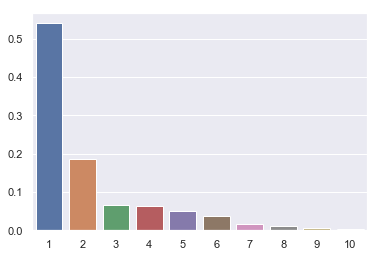

In [64]:
sns.barplot(x=np.arange(1,11),y=pca.explained_variance_ratio_)

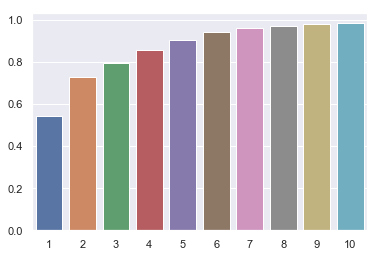

In [65]:
sns.barplot(x=np.arange(1,11),y=np.cumsum(pca.explained_variance_ratio_))

Inorder to consider 95% of variance of data, will consider 7 Principal Components.

In [66]:
# Getting PCAs for 7 components to use it in model
pca=PCA(n_components=7)
pca=pca.fit(X_scaled)
X_pca_scaled=pd.DataFrame(data=pca.transform(X_scaled))

### 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (10 marks)

#### Train Test Split:

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_pca_scaled,y,test_size=0.3,stratify=y,random_state=1)

#### Model Training:

In [69]:
svc_model=SVC()
svc_model=svc_model.fit(X_train,y_train)
svc_model_ytest_pred=svc_model.predict(X_test)
print("Training data accuracy: ",accuracy_score(y_train,svc_model.predict(X_train)))
print("Testing data accuracy: ",accuracy_score(y_test,svc_model_ytest_pred))

Training data accuracy:  0.9442567567567568
Testing data accuracy:  0.9251968503937008


In [70]:
svc_cm=confusion_matrix(y_true=y_test,y_pred=svc_model_ytest_pred,labels=['car','bus','van'])
svc_cmdf=pd.DataFrame(data=svc_cm,columns=['Predict car','Predict bus','Predict van'],index=['Actual car','Actual bus','Actual van'])
svc_cmdf

,Predict car,Predict bus,Predict van
Actual car,117,2,10
Actual bus,0,63,2
Actual van,2,3,55


In [71]:
print(classification_report(y_true=y_test,y_pred=svc_model_ytest_pred))

              precision    recall  f1-score   support

         bus       0.93      0.97      0.95        65
         car       0.98      0.91      0.94       129
         van       0.82      0.92      0.87        60

    accuracy                           0.93       254
   macro avg       0.91      0.93      0.92       254
weighted avg       0.93      0.93      0.93       254



In [72]:
model_perf_df=pd.concat([model_perf_df,pd.DataFrame({'MODE':['PCA'],'ACCURACY':accuracy_score(y_test,svc_model_ytest_pred)})],axis=0)

#### KFold Cross Validation:

In [73]:
svc_model=SVC()
accuracy_score_list=[]
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for train_idx,test_idx in skf.split(X_pca_scaled,y):
    X_train, X_test=X_pca_scaled.iloc[train_idx,:],X_pca_scaled.iloc[test_idx,:]
    y_train, y_test=y.iloc[train_idx],y.iloc[test_idx]
    svc_model=svc_model.fit(X_train,y_train)
    accuracy_score_list.append(accuracy_score(y_test,svc_model.predict(X_test)))

print("List of Test Accuracies: ",accuracy_score_list)
print("Average Test accuracy of the model: ",np.mean(accuracy_score_list))

List of Test Accuracies:  [0.9235294117647059, 0.8757396449704142, 0.9526627218934911, 0.9289940828402367, 0.9171597633136095]
Average Test accuracy of the model:  0.9196171249564916


In [74]:
model_perf_df.loc[model_perf_df['MODE']=='PCA','AVG. ACCURACY']=np.mean(accuracy_score_list)

In [75]:
cross_val_df=pd.concat([cross_val_df,pd.DataFrame(data={'TEST_ACCURACY':accuracy_score_list,'MODE':'PCA'})],axis=0)

### 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

In [76]:
# Cross validation scores for each iteration of RAW and PCA.
# Same index value for RAW and PCA indicates that same set of test and train data used(But in RAW and PCA modes)
cross_val_df

,TEST_ACCURACY,MODE
0,0.917647,RAW
1,0.869822,RAW
2,0.934911,RAW
3,0.917160,RAW
4,0.928994,RAW
0,0.923529,PCA
1,0.875740,PCA
2,0.952663,PCA
3,0.928994,PCA
4,0.917160,PCA


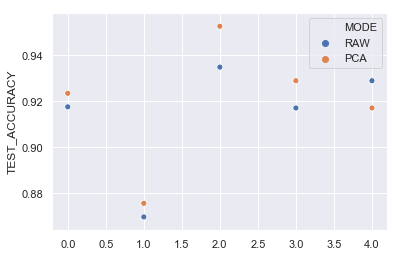

In [77]:
# Plot between corresponding cross validation accuracy of both RAW and PCA.
# Since we have done total 5 cross validations, we can see the values for the same between 0 and 4 in x-axis & 
# the corresponding accuracy for RAW and PCA on y-axis.
sns.scatterplot(x=cross_val_df.index,y=cross_val_df['TEST_ACCURACY'],hue=cross_val_df['MODE'])

Above clearly states that, 4 out of 5 cross validations have got better accuracy for model with PCA. <br>
Only for 1 cross validation, that is for the last one, model with RAW has given better results. <br>


In [78]:
model_perf_df

,ACCURACY,AVG. ACCURACY,MODE
0,0.889764,0.913707,RAW
0,0.925197,0.919617,PCA


Text(0.5, 1.0, 'MODE VS AVG. ACCURACY')

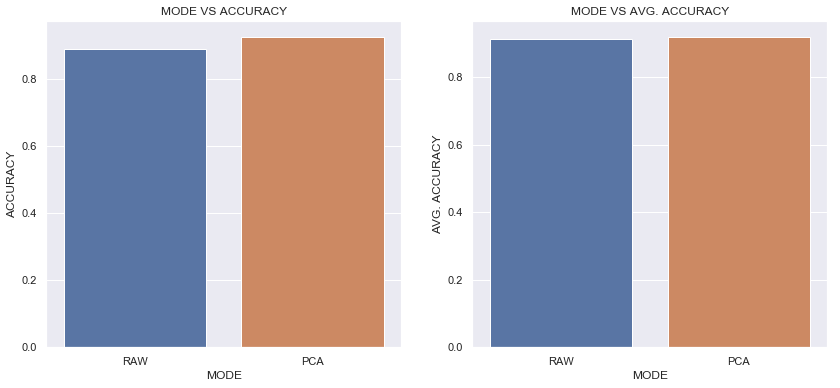

In [79]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.barplot(x='MODE',y='ACCURACY',data=model_perf_df,ax=ax[0])
ax[0].set_title("MODE VS ACCURACY")
sns.barplot(x='MODE',y='AVG. ACCURACY',data=model_perf_df,ax=ax[1])
ax[1].set_title("MODE VS AVG. ACCURACY")

Axis 0:
Above clearly states that test accuracy for PCA is 3.5% more than accuracy with RAW.

Axis 1:
By using PCA, the average cross validation accuracy has increased by 0.6%

#### Conclusion

1. Manual analysis, selection and removal of correlated features consume significant efforts.
2. Even after spending significant efforts, accuracies of the RAW model are still less when compared to model with PCA.
3. PCA helps in reducing the dimensionality in no-time when compared to manual analysis.
4. PCA helped to reduce the no. of features from 18 to 7 which explains 96% of data variance. It helped in reducing curse of    dimensionality.
5. Though manual analysis took time, it helped in identifying the right features which actually help in model prediction. So, in future, we can directly avoid un-necessary features during pre-processing stage itself. However, finding out the importance of the features with PCA is difficult.